M1 biostatistic
May, 2020

*********************

# Project chaoseverywhere

Authors : Coiffier Ophélie, Gaizi Ibrahim, Lefort Tanguy

# Table of Contents 
1. [Generalities]
    1. [Our package]
    1. [Definitions]
2. [The logistic function]
    1. [The setup]
    1. [The definition]
    1. [A result : The bifurcation]
3. [Mandlebrot]
4. [Conclusion]
    

# 1. Generalities

## 1. Our package

Our package, called chaoseverywhere, includes two themes : Mandelbrot set and Logistic map. Thanks to this package, in a first part, we can draw the logistic sequence, the bifurcation diagramm and we can animated the logistic sequence to watch the creation of the chaos. In a second part, we can draw the Mandelbrot map and zoom in on it, we can determine coordinates of points, in the Mandlebrot set and the speed of divergence and finally, see the Mandelbrot set in 3D. If we want to change the equation in the Mandlebrot set (change the function : $z^2+c$), we can do it too (with the function mandel_transform).

## 2. Definitions

Our subject deals with fractales and the chaos. We begin to define them. In a second part, we will explain them, with more details and with animations.

Firstly, the chaos in mathematic, apparently is a random behaviour. It's a disorder in a determinist system. Actually, a system is considering as chaotic if : 
1) It's sensitive to the initial conditions : the slightest modification will have a different movement absolutely.
2) It includes recurrence : A movement starting at a point will come back, an infinite number of times, nearest that we want of this point.
Moreover, the chaos can appear in system which has small dimensions. It must have, at least, three dimensions to create the chaos. But it can't appear in system which has one or two variables. 

Secondly, we will define the fractal term. A fractal is an object whose the structure is invariable when we change the scale. There are some caracterisitcs to have a fractal figure (it's not an obligation to have all these caracteristics) :
1) The figure has similar details at different scale.
2) The entire figure looks like one of this parts. The figure is entirely or statistically autosimilar.
3) The structure has non integer dimensions.

# 2. The logistic function
## 1. The setup


To create the logistic map and the bifurcation map, we need some packages.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed, IntSlider
import sys
import os
%matplotlib notebook

In [3]:
from mayavi import mlab
mlab.init_notebook()

Notebook initialized with x3d backend.


We need to import our package `chaoseverywhere` too. To use all the functions that we made to draw graph, define logistic sequence, animate this sequence, ... 

In [32]:
sys.path.append(os.path.dirname(os.path.abspath('chaoseverywhere')) + (os.path.sep + '..')*2)
import chaoseverywhere

## 2. The definition

The logistic map is a non linear sequence : $x_{n+1}=rx_n(1-x_n)$, $r\in[0,4]$.
We can also write this function without sequences : $f(x)=rx(1-x)$. We note `r` the growth ratio of the sequence and `x0` the starting point, where `x0` $\in [0,1]$ .

Firstly, we study an example with `r = 1.9`, `x0 = 0.01` and `iteration = 100`. In this case, `iteration` represents the number of iteration to draw the sequence. We choose `iteration = 100 ` to view the convergence of the sequence.
Before drawing the logistic sequence, we look at the place of the first point, `x0 = 0.01` and `f(x0)` equals to :

In [3]:
fx=chaoseverywhere.logistic(r=1.9, x=0.01)
print("f(0.01)=",fx) 

f(0.01)= 0.01881


Now, we draw the curve $(y=x)$ and trace the logistic sequence, with the parameters defined above. Moreover, we had the number of points that we want between $0$ and $1$ on the x-axis. Here, we choose `points = 100`.

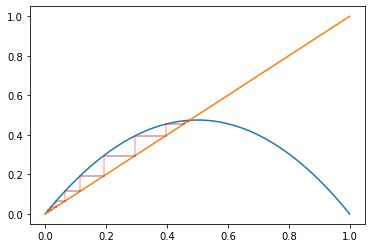

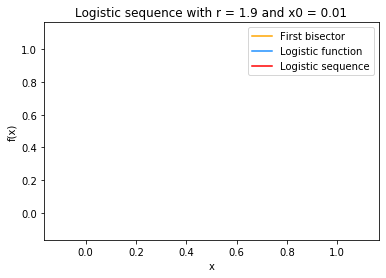

In [5]:
chaoseverywhere.logistic_draw(0.01, 1.9, 100, 100)
fig = plt.gca()
plt.title('Logistic sequence with r = 1.9 and x0 = 0.01')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot([],[], color='orange', label = 'First bisector')
plt.plot([],[], color='dodgerblue', label = 'Logistic function')
plt.plot([],[], color='red', label = 'Logistic sequence')
plt.legend()
plt.show()

As we decided, we start at $0.01$. We notice that the sequence converges on `x = 0.5`.

An other exemple with `r = 3.6`, `x0 = 0.01`, `iteration = 50` and `points = 100`. We choose, this time, `iteration = 50` because, we want to see the beginning of the chaos, that's why we don't need a lot of repetition. 

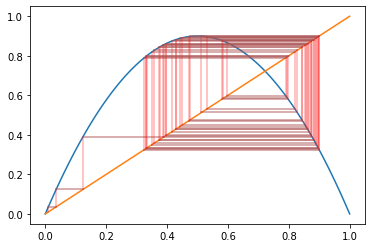

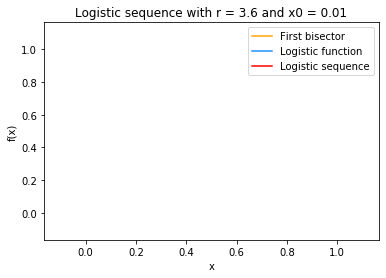

In [6]:
chaoseverywhere.logistic_draw(0.01, 3.6, 50, 100)
plt.title('Logistic sequence with r = 3.6 and x0 = 0.01')
plt.xlabel('x')
plt.ylabel('f(x)')
fig = plt.gca()
plt.plot([],[], color='orange', label = 'First bisector')
plt.plot([],[], color='dodgerblue', label = 'Logistic function')
plt.plot([],[], color='red', label = 'Logistic sequence')
plt.legend()
plt.show()

We observe that the chaotic diagram appears when the coefficient `r` is superior or equal to $3.57$.
Actually, the chaos is the representation of a graph who depends on the initial parameters. If we choose `r <= 3.57`, we don't see the chaotic representation, while we see this kind of graph when `r > 3.57`. An other condition is to have the divergence of the sequence. The sequence fluctuates between an interval of values, whereas, when `r <= 3.57`, we see the convergence toward an unique point. In the graph above, we see these two conditions : the red graph is not convergent and if we compare with the previous graph, we notice that the parameters influence the kind of representation.

To show that it's really this coefficient, we add a widget. Our widget is a button that we can move along an interval with a defined step. With this widget, we can change the value of `r` and see the corresponding graph. Here, `x0` is fixed and `r` can move between $1$ and $4$ with a step of $0.001$. The graph changes as we move the widget.

In [13]:
interact(chaoseverywhere.plot_logi_interact, x0=fixed(0.01), mu=FloatSlider(min=1, max=4, step=0.001, continuous_update=False),
         nb_iter=IntSlider(min=10, max=150, step=10, value=60),
         linsdim=fixed(100))
plt.title('Interactive logistic sequence')
plt.xlabel('mu')
plt.ylabel('f(x)')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'f(x)')

With this application, we notice that the coefficient `r` influences the representation of the logistic sequence, especially its convergence and we can see the starting of the chaos graph. Finally, we precisely define the condition of the chaos in this example.

Then, we see all the evolution of the logistic sequence, with this animated function. The parameter `r` changes as the animation leads. The logistic map appears for each `r`.

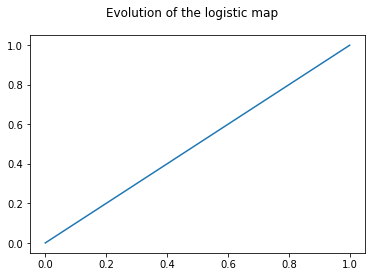

In [8]:
chaoseverywhere.animate_logistic(save=False)

## 3. A result : The bifurcation

To observe the behaviour of the logistic sequence, we draw the bifurcation map.

In [9]:
chaoseverywhere.bifurcation(show=True)

<IPython.core.display.Javascript object>

When `r` $\in [0, 1[$, we have an unique attractive fixed point : $0$. The graph has not bifurcation. Then, this fixed point become repulsive when a secund attractive fixed point appears. That happens when `r` $\in [1, 3[$. On the graph, we have the first bifurcation. Next, the secund fixed point becomes repulsive and we notice an other bifurcation. The behaviour, after `r` $> 3$, is more complexe. There are two points of bifurcation around $3.5$ because the fixed points are 2-periodic : $\exists k>0, f^k(x)=x$, where $k$ is the period. In this example, $k = 2$, there is an oscillation between two values. Finally, the endlessly behaviour consists to : more `r` increases, more there are different periods. That's why, we have all these bifurcations on the graph.

We notice that the first branch divides in two branches, then each new branch divides in two branches too, etc ... It calls the autosimilarity. Actually, the autosimilarity is the similarity that an object has, whichever the scale. Often, we call autosimilar objects, fractals. If we elarge a bifurcation, we find the same image that the first graph (or the image above). The general structure recurs ; There is a fractal effect on the bifurcation diagramm.
Besides, we add that on each new branch defined, the following bifurcation occurs in the same time on the other branches.

We know a set which has internal autosimilar structure : The Mandelbrot set. Each bud, on the graph representing the Mandlebrot set, carries bud in turn. And this phenomenon endlessly recurs. So, we find fractals on this graph.

Futhermore, buds on a main bud is a representation of the different periodicity, that we explain in the bifurcation part : each bifurcation is represented by a new bud. So, we find, in this set, the dividing into two of the logistic equation bifurcation's period. 

# 3.Mandlebrot

# 4. Conclusion

On the real axis, there is a bijective link between the logistic equation, the bifurcation and the Mandlebrot set. This link is shown by this animation :

In [5]:
from matplotlib import rc
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False, # possibly set False if no Latex install on your machine
          'figure.figsize': (10, 7),
          'font.family' : 'sans-serif'}
plt.rcParams.update(params)
rc('animation', html='html5')

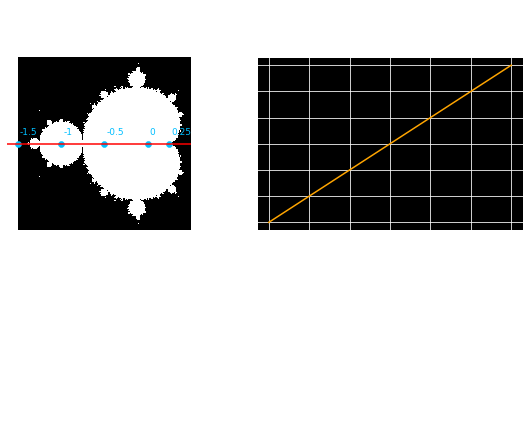

In [6]:
chaoseverywhere.connections()

We can see on this animation the two Mandlebrot objects : the Mandlebrot set and the logistic map. The moving red line shows the place that we are
    on these three graphs, at the same time.

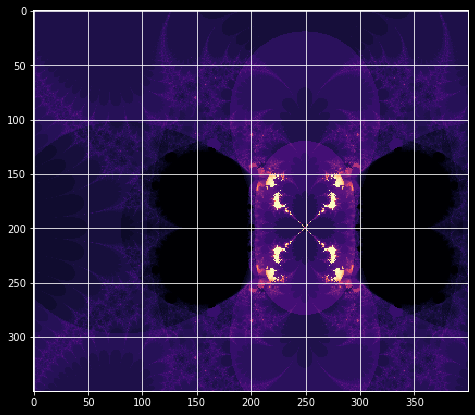

In [47]:
def f(z,c):
     return(np.cosh(z)+(1/(c**2)))
beautiful_image = chaoseverywhere.Mandelbrot_disp(0, 0, 5, 500, 800).mandel_transform(FUN=f)

plt.imshow(beautiful_image[200:550:,150:550], cmap='magma')
plt.show()